<a href="https://colab.research.google.com/github/jamie07262/jamie07262/blob/main/Track_3_Predict_2024_Olympics_Champion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving History of Summer Olympics.xlsx to History of Summer Olympics (4).xlsx
Saving Medals.xlsx to Medals (4).xlsx
Saving Athletes.xlsx to Athletes (4).xlsx
Saving Coaches.xlsx to Coaches (4).xlsx
Saving EntriesGender.xlsx to EntriesGender (4).xlsx
Saving Teams.xlsx to Teams (4).xlsx


In [ ]:
import io
import pandas as pd
import plotly.express as px

df = pd.read_excel('Medals (4).xlsx')
team_info = pd.read_excel('Teams (4).xlsx')
gender= pd.read_excel('EntriesGender (4).xlsx')

print("Medals")
display(df)

print("Team Information")
display(team_info)

print("Gender")
display(gender)

Medals


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


Team Information


,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women
...,...,...,...,...
738,South Africa,Water Polo,South Africa,Women
739,Spain,Water Polo,Spain,Men
740,Spain,Water Polo,Spain,Women
741,United States,Water Polo,United States of America,Men


Gender


,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041
5,Badminton,86,87,173
6,Baseball/Softball,90,144,234
7,Basketball,144,144,288
8,Beach Volleyball,48,48,96
9,Boxing,102,187,289


In [ ]:
#Obtaining the top 10 countries to obtain the most gold medals
df.head(10)

# DATA VISUALIZATION

In [ ]:
#Visualization for the Top Ten Countries in the form of Histogram
newdf = df.head(10)
fig = px.histogram(newdf, x='Team/NOC', y='Gold', title= 'Top Ten Countries')
fig.show()

In [ ]:
#Pie Chart to better visualize the top 10 countries and the number of gold medals they won
fig = px.pie(newdf, values='Gold', names='Team/NOC', title='Top 10 Countries')
fig.show()

In [ ]:
#Displaying women in sports
fig = px.histogram(gender, x='Female', y='Discipline', title= 'Female in Sports')
fig.show()



In [ ]:
#Displaying men in sports
fig = px.histogram(gender, x='Male', y='Discipline', title= 'Male in Sports')
fig.show()

In [ ]:
#The sports each country is competing in
fig = fig = px.histogram(team_info, x="Discipline", color="NOC", title='BAR GRAPH SHOWING WHAT SPORTS THE COUNTRIES ARE COMPETINING IN')
fig.show()

# Linear Regression

In [ ]:
#import the libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#use the data from the Excel file
data = pd.read_excel('Medals.xlsx')

#create the independent and dependent variables from certain columns in the Excel file
countries = data ['Rank'].values
medals = data['Gold'].values



In [ ]:
from sklearn import preprocessing

# suppose that 'countries' is your initial column of countries
le = preprocessing.LabelEncoder()
encoded_countries = le.fit_transform(countries)

# now 'encoded_countries' is your encoded data, and you can inverse transform it anytime
decoded_countries = le.inverse_transform(encoded_countries)

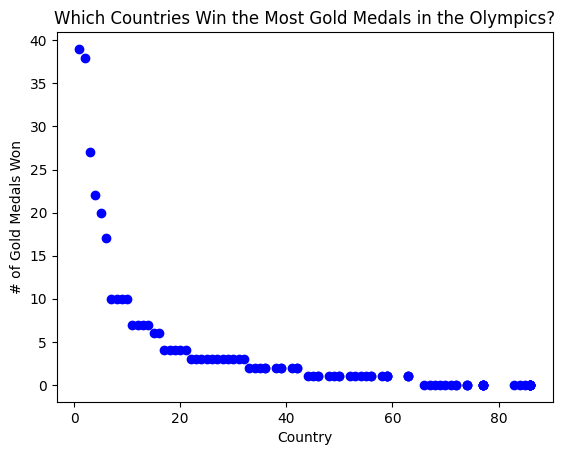

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Visualize the data
plt.scatter(countries, medals, marker ='o', color ='blue')
plt.title('Which Countries Win the Most Gold Medals in the Olympics?')
plt.xlabel('Country')
plt.ylabel('# of Gold Medals Won')
plt.figure(figsize=(12, 8))
plt.show()

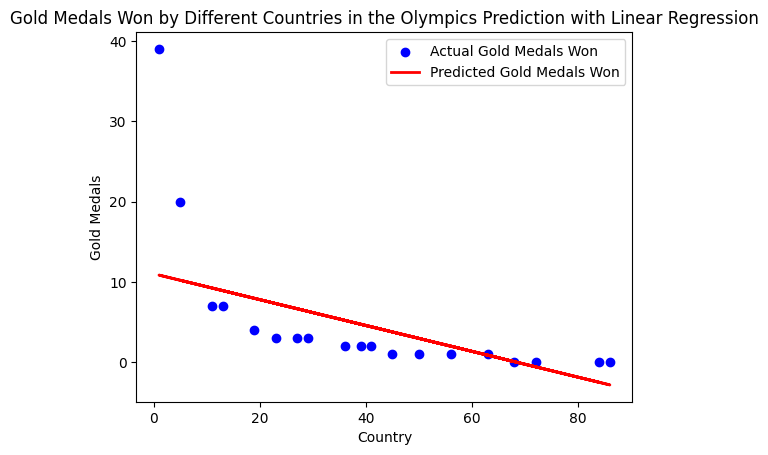

In [ ]:
#split the data into a training and testing set, with 20% for testing
x_train, x_test, y_train, y_test = train_test_split(countries, medals, test_size=0.2, random_state=42)

#reshape the data for NumPy
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

#create a linear regression model
model = LinearRegression()

#train it using the training data
model.fit(x_train, y_train)

#make predictions on the testing data
predictions = model.predict(x_test)

#create a plot for the predictions
plt.scatter(x_test, y_test, marker='o', color='blue', label='Actual Gold Medals Won') #make a scatter plot for the actual data and a label for the legend
plt.plot(x_test, predictions, color='red', linewidth=2, label='Predicted Gold Medals Won') #make a line graph for the predicted data and a label for the legend

plt.title('Gold Medals Won by Different Countries in the Olympics Prediction with Linear Regression') #add a title
plt.xlabel('Country') #add a title to the x axis...
plt.ylabel('Gold Medals') #...and the y axis

plt.legend() #create
plt.show() #show the scatter plot

### SECTION WHERE ATTEMPTS WERE MADE WITH POSSION, DIXON-COLES AND TENSOR FLOW

# Poisson Distribution

> Add blockquote



In [ ]:
#import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam

#extract data from excel
HomeAdvantage = pd.read_excel("OlympicsHomeAdvantage.xlsx")
HomeAdvantage = HomeAdvantage[['HomeTeam','AwayTeam','HomeGold','AwayGold']]
HomeAdvantage.head() #show a table of the extracted data

,HomeTeam,AwayTeam,HomeGold,AwayGold
0,Japan,USA,27,39
1,Japan,France,27,10
2,USA,Japan,44,3
3,France,Japan,13,0
4,Brazil,USA,7,46


In [ ]:
#HomeAdvantage.mean()

In [ ]:
# importing the tools required for the Poisson regression model
import statsmodels.api as sm
import statsmodels.formula.api as smf

#create a model
gold_model_data = pd.concat([HomeAdvantage[['HomeTeam','AwayTeam','HomeGold']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent','HomeGold':'gold'}),
           HomeAdvantage[['AwayTeam','HomeTeam','AwayGold']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent','AwayGold':'gold'})])

poisson_model = smf.glm(formula="gold ~ home + team + opponent", data=gold_model_data,
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   gold   No. Observations:                  176
Model:                            GLM   Df Residuals:                      138
Model Family:                 Poisson   Df Model:                           37
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -750.49
Date:                Fri, 12 Jul 2024   Deviance:                       787.84
Time:                        14:31:18   Pearson chi2:                     636.
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.8233      0.147     12.421      0.000       1.536       2.111
team[T.Belgium]             -0.2626      0.207     -1.267      0.205      -0.669       0.144
team[T.Brazil]              -0.9258      0.267     -3.463      0.001      -1.450      -0.402
team[T.Canada]              -2.6604      0.588     -4.523      0.000      -3.813      -1.508
team[T.China]                0.9594      0.147      6.528      0.000       0.671       1.247
team[T.Finland]             -0.4632      0.223     -2.078      0.038      -0.900      -0.026
team[T.France]               0.0957      0.130      0.734      0.463      -0.160       0.351
team[T.Germany]              0.2993      0.152      1.970      0.049       0.001       0.597
team[T.Greece]              -0.6815      0.201     -3.389      0.001      -1.076      -0.287
team[T.Italy]                0.0911      0.184      0.494      0.621      -0.270       0.452
team[T.Japan]                0.2236      0.155      1.446      0.148      -0.079       0.527
team[T.Mexico]              -1.9673      0.423     -4.646      0.000      -2.797      -1.137
team[T.Netherlands]         -0.7633      0.250     -3.049      0.002      -1.254      -0.273
team[T.South Korea]         -0.3251      0.212     -1.534      0.125      -0.741       0.090
team[T.Soviet Union]         1.4667      0.134     10.918      0.000       1.203       1.730
team[T.Spain]               -0.3251      0.212     -1.534      0.125      -0.741       0.090
team[T.Sweden]               0.2299      0.177      1.302      0.193      -0.116       0.576
team[T.UK]                   0.6263      0.134      4.660      0.000       0.363       0.890
team[T.USA]                  1.4854      0.126     11.829      0.000       1.239       1.732
opponent[T.Belgium]          0.0669      0.121      0.552      0.581      -0.171       0.305
opponent[T.Brazil]           0.1215      0.119      1.019      0.308      -0.112       0.355
opponent[T.Canada]          -0.0733      0.127     -0.578      0.564      -0.322       0.175
opponent[T.China]           -0.0007      0.124     -0.006      0.995      -0.244       0.242
opponent[T.Finland]          0.0288      0.123      0.235      0.814      -0.212       0.269
opponent[T.France]           0.0960      0.089      1.077      0.281      -0.079       0.271
opponent[T.Germany]         -0.0874      0.116     -0.752      0.452      -0.315       0.140
opponent[T.Greece]          -0.1121      0.117     -0.957      0.338      -0.342       0.117
opponent[T.Italy]           -0.0950      0.128     -0.743      0.457      -0.346       0.156
opponent[T.Japan]            0.0632      0.111      0.568      0.570      -0.155       0.281
opponent[T.Mexico]           0.0854      0.121      0.709      0.478      -0.151       0.322
opponent[T.Net

In [ ]:
#have the model predict the average number of gold medals that France will win when hosting
poisson_model.predict(pd.DataFrame(data={'team': 'France', 'opponent': 'USA',
                                       'home':1},index=[1]))

1    16.627668
dtype: float64

In [ ]:
#have the model predict the average number of gold medals that the USA will win when France is hosting
poisson_model.predict(pd.DataFrame(data={'team': 'USA', 'opponent': 'France',
                                       'home':0},index=[1]))

1    30.105085
dtype: float64

In [ ]:
def simulate_match(foot_model, homeTeam, awayTeam, max_gold=90):
    home_gold_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam,
                                                            'opponent': awayTeam,'home':1},
                                                      index=[1])).values[0]
    away_gold_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam,
                                                            'opponent': homeTeam,'home':0},
                                                      index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_gold+1)] for team_avg in [home_gold_avg, away_gold_avg]]
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))
simulate_match(poisson_model, 'France', 'USA', max_gold=90)
#the rows of the matrix show the probability of France and the columns of the matrix show the probability of france to win a specific number of gold medals

array([[5.06084859e-21, 1.52357276e-19, 2.29336435e-18, ...,
        3.59937633e-25, 1.21752280e-25, 4.07262524e-26],
       [8.41501102e-20, 2.53334620e-18, 3.81333010e-17, ...,
        5.98492346e-24, 2.02445650e-24, 6.77182605e-25],
       [6.99610047e-19, 2.10618198e-17, 3.17033935e-16, ...,
        4.97576602e-23, 1.68309953e-23, 5.62998377e-24],
       ...,
       [7.39738823e-48, 2.22699000e-46, 3.35218613e-45, ...,
        5.26116987e-52, 1.77964006e-52, 5.95291275e-53],
       [1.38203726e-48, 4.16063487e-47, 6.26281327e-46, ...,
        9.82932427e-53, 3.32486113e-53, 1.11216918e-53],
       [2.55333963e-49, 7.68685060e-48, 1.15706644e-46, ...,
        1.81598601e-53, 6.14274300e-54, 2.05475332e-54]])



```
`# This is formatted as code`
```


# Dixon-Coles

In [ ]:
#import the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import poisson,skellam
from scipy.optimize import minimize

#extract data from the excel file
HomeAdvantage = pd.read_excel("OlympicsHomeAdvantage.xlsx")
HomeAdvantage = HomeAdvantage[['RankHome','RankAway','HomeGold','AwayGold']]
HomeAdvantage.head() #show a table of the extracted data

,RankHome,RankAway,HomeGold,AwayGold
0,3,1,27,39
1,3,8,27,10
2,1,3,44,3
3,8,3,13,0
4,12,1,7,46


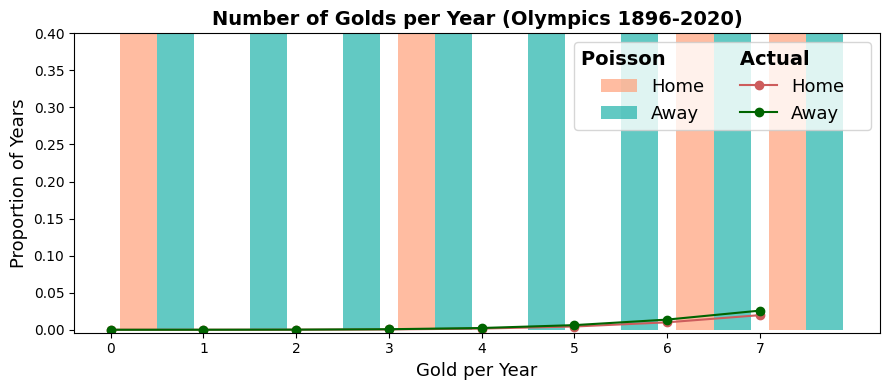

In [ ]:
# construct Poisson for each mean gold value
poisson_pred = np.column_stack([[poisson.pmf(i, HomeAdvantage.mean()[j]) for i in range(8)] for j in range(2)])

#size the figure
fig, ax = plt.subplots(figsize=(9,4))
# plot histogram of actual gold medals won
plt.hist(HomeAdvantage[['HomeGold', 'AwayGold']].values, range(9),
         alpha=0.7, label=['Home', 'Away'], color=["#FFA07A", "#20B2AA"])

# add lines for the Poisson distributions
pois1, = plt.plot([i-1 for i in range(1,9)], poisson_pred[:,0],
                  linestyle='-', marker='o',label="Home", color = '#CD5C5C')
pois2, = plt.plot([i-1 for i in range(1,9)], poisson_pred[:,1],
                  linestyle='-', marker='o',label="Away", color = '#006400')

#make a legend
leg=plt.legend(loc='upper right', fontsize=13, ncol=2)
leg.set_title("Poisson           Actual        ", prop = {'size':'14', 'weight':'bold'})

#make the x and y axis, and the plot in general
plt.xticks([i-1 for i in range(1,9)],[i for i in range(8)])
plt.xlabel("Gold per Year",size=13)
plt.ylabel("Proportion of Years",size=13)
plt.title("Number of Golds per Year (Olympics 1896-2020)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.4])
plt.tight_layout()
plt.show()

In [ ]:
# importing the tools for the Poisson regression model
import statsmodels.api as sm
import statsmodels.formula.api as smf

#create the model
gold_model_data = pd.concat([HomeAdvantage[['RankHome','RankAway','HomeGold']].assign(home=1).rename(
            columns={'RankHome':'team', 'RankAway':'opponent','HomeGold':'gold'}),
           HomeAdvantage[['RankAway','RankHome','AwayGold']].assign(home=0).rename(
            columns={'RankAway':'team', 'RankHome':'opponent','AwayGold':'gold'})])

poisson_model = smf.glm(formula="gold ~ home + team + opponent", data=gold_model_data,
                        family=sm.families.Poisson()).fit()

print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   gold   No. Observations:                  174
Model:                            GLM   Df Residuals:                      170
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1608.6
Date:                Fri, 12 Jul 2024   Deviance:                       2513.8
Time:                        15:17:05   Pearson chi2:                 2.94e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9101
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6864      0.034     79.219      0.0

In [ ]:
#how many gold medals France (hosting the olympics) would be expected to win
poisson_model.predict(pd.DataFrame(data={'team': 'France', 'opponent': 'USA',
                                       'home':1},index=[1]))

In [ ]:
#how many gold medals the USA (not hosting hosting) would be expected to win
poisson_model.predict(pd.DataFrame(data={'team': 'USA', 'opponent': 'France',
                                       'home':0},index=[1]))

In [ ]:
#gold medal winning probability matrix
def simulate_olympics(foot_model, homeTeam, awayTeam, max_gold=90):
    home_gold_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam,
                                                            'opponent': awayTeam,'home':1},
                                                      index=[1])).values[0]
    away_gold_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam,
                                                            'opponent': homeTeam,'home':0},
                                                      index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_gold+1)] for team_avg in [home_gold_avg, away_gold_avg]]
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))
ars_sou = simulate_olympics(poisson_model, 'France', 'USA', max_gold=90)
print(ars_sou[0:5, 0:5])

In [ ]:
#create a probabilty matrix with colours
from matplotlib.colors import ListedColormap

def matrix_gif(matrix, colour_matrix, colour_map, subtitle="", heatmap=False, alpha=0.8):
    fig, ax1 = plt.subplots(1, figsize=(5,5))
    if heatmap:
        ax1.matshow(matrix, alpha=alpha)
    else:
        ax1.matshow(colour_matrix, cmap=colour_map, alpha=alpha)
    ax1.tick_params(axis=u'both', which=u'both',length=0)
    ax1.grid(which='major', axis='both', linestyle='')
    ax1.set_xlabel('Away Team Gold', fontsize=12)
    ax1.set_ylabel('Home Team Gold', fontsize=12)
    ax1.xaxis.set_label_position('top')
    nrows, ncols = matrix.shape
    for i in range(nrows):
        for j in range(ncols):
            c = matrix[i][j]
            ax1.text(j, i, str(round(c,4)), va='center', ha='center', size=13)
    plt.figtext(0.5, 0.05, subtitle, horizontalalignment='center',
                fontsize=14, multialignment='left', fontweight='bold')
    return fig

cmap = ListedColormap(['w', '#04f5ff', '#00ff85', '#e90052'])
matrix = simulate_match(poisson_model, 'France', 'USA', max_gold=90)
matn = len(matrix)
matrix_gif(matrix, matrix, ListedColormap(['w']), heatmap=True,
           alpha=0.6, subtitle="Match Score Probability Matrix").savefig("match_matrix_0.png")
plt.close()
for t,(mat,colour,subtitle) in enumerate(zip([np.zeros((matn, matn)), np.tril(np.ones((matn,matn)),-1),
                            np.triu(np.ones((matn,matn))*2,1), np.diag([3]*matn),
                                             np.array([0 if i+j<3 else 1 for i in range(matn) for j in range(matn)]).reshape(matn,matn)],
                          ['w', '#04f5ff', '#00ff85', '#e90052','#EAF205'],
                                   ['Match Score Probability Matrix', 'Home Win', 'Away Win', 'Draw', 'Over 2.5 gold???gotta change this'])):
    matrix_gif(matrix, mat, ListedColormap(['w'] + [colour]), heatmap=False,
               alpha=0.6, subtitle=subtitle).savefig("match_matrix_{}.png".format(t+1))
    plt.close()

In [ ]:
def poiss_actual_diff(olympics_exl, max_gold):
    HomeAdvantage = pd.read_excel('OlympicsHomeAdvantage.xlsx')
    HomeAdvantage = HomeAdvantage[['HomeTeam','AwayTeam','HomeGold','AwayGold']]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_gold)] \
                 for team_avg in [HomeAdvantage['HomeGold'].mean(), HomeAdvantage['AwayGold'].mean()]]
    return np.outer(np.array(team_pred[0]), np.array(team_pred[1])) - \
        np.array([sum((HomeAdvantage['HomeGold']==i) & (HomeAdvantage['AwayGold']==j))
                  for i in range(max_gold) for j in range(max_gold)]).reshape((6,6))/len(HomeAdvantage)

year_arrays = []
for year in range(1896,2020):
    year_arrays.append(poiss_actual_diff("OlympicsHomeAdvantage.xlsx".format(
        str(year)[-2:], str(year+1)[-2:]),6))

In [ ]:
cmap = sns.diverging_palette(10, 133, as_cmap=True)

fig, ax = plt.subplots(figsize=(5,5))
with sns.axes_style("white"):
    ax = sns.heatmap(np.mean(year_arrays, axis=0), annot=True, fmt='.4f', cmap=cmap, vmin=-0.013, vmax=.013, center=0.00,
                square=True, linewidths=.5, annot_kws={"size": 11}, cbar_kws={"shrink": .8})
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.grid(which='major', axis='both', linestyle='')
    ax.set_xlabel('Away Team Gold', fontsize=13)
    ax.set_ylabel('Home Team Gold', fontsize=13)
    ax.xaxis.set_label_position('top')
    ax.xaxis.set_ticks_position('top')
    plt.figtext(0.45, 0.1, 'Actual Proportion - Model Probability', horizontalalignment='center',
                fontsize=14, multialignment='left', fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
def rho_correction(x, y, lambda_x, mu_y, rho):
    if x==0 and y==0:
        return 1- (lambda_x * mu_y * rho)
    elif x==0 and y==1:
        return 1 + (lambda_x * rho)
    elif x==1 and y==0:
        return 1 + (mu_y * rho)
    elif x==1 and y==1:
        return 1 - rho
    else:
        return 1.0

In [ ]:
def rho_correction(x, y, lambda_x, mu_y, rho):
    if x==0 and y==0:
        return 1- (lambda_x * mu_y * rho)
    elif x==0 and y==1:
        return 1 + (lambda_x * rho)
    elif x==1 and y==0:
        return 1 + (mu_y * rho)
    elif x==1 and y==1:
        return 1 - rho
    else:
        return 1.0

In [ ]:
def solve_parameters(dataset, debug = False, init_vals=None, options={'disp': True, 'maxiter':100},
                     constraints = [{'type':'eq', 'fun': lambda x: sum(x[:20])-20}] , **kwargs):
    teams = np.sort(dataset['HomeTeam'].unique())
    # check for no weirdness in dataset
    away_teams = np.sort(dataset['AwayTeam'].unique())
    if not np.array_equal(teams, away_teams):
        raise ValueError("Something's not right")
    n_teams = len(teams)
    if init_vals is None:
        # random initialisation of model parameters
        init_vals = np.concatenate((np.random.uniform(0,1,(n_teams)), # attack strength
                                      np.random.uniform(0,-1,(n_teams)), # defence strength
                                      np.array([0, 1.0]) # rho (score correction), gamma (home advantage)
                                     ))
    def dc_log_like(x, y, alpha_x, beta_x, alpha_y, beta_y, rho, gamma):
        lambda_x, mu_y = np.exp(alpha_x + beta_y + gamma), np.exp(alpha_y + beta_x)
        return (np.log(rho_correction(x, y, lambda_x, mu_y, rho)) +
                np.log(poisson.pmf(x, lambda_x)) + np.log(poisson.pmf(y, mu_y)))

    def estimate_paramters(params):
        score_coefs = dict(zip(teams, params[:n_teams]))
        defend_coefs = dict(zip(teams, params[n_teams:(2*n_teams)]))
        rho, gamma = params[-2:]
        log_like = [dc_log_like(row.HomeGold, row.AwayGold, score_coefs[row.HomeTeam], defend_coefs[row.HomeTeam],
                     score_coefs[row.AwayTeam], defend_coefs[row.AwayTeam], rho, gamma) for row in dataset.itertuples()]
        return -sum(log_like)
    opt_output = minimize(estimate_paramters, init_vals, options=options, constraints = constraints, **kwargs)
    if debug:
        # sort of hacky way to investigate the output of the optimisation process
        return opt_output
    else:
        return dict(zip(["attack_"+team for team in teams] +
                        ["defence_"+team for team in teams] +
                        ['rho', 'home_adv'],
                        opt_output.x))

In [ ]:
params = solve_parameters(HomeAdvantage)

In [ ]:
params

In [ ]:
def calc_means(param_dict, homeTeam, awayTeam):
    return [np.exp(param_dict['attack_'+homeTeam] + param_dict['defence_'+awayTeam] + param_dict['home_adv']),
            np.exp(param_dict['defence_'+homeTeam] + param_dict['attack_'+awayTeam])]

def dixon_coles_simulate_match(params_dict, homeTeam, awayTeam, max_goald=90):
    team_avgs = calc_means(params_dict, homeTeam, awayTeam)
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_gold+1)] for team_avg in team_avgs]
    output_matrix = np.outer(np.array(team_pred[0]), np.array(team_pred[1]))
    correction_matrix = np.array([[rho_correction(home_gold, away_gold, team_avgs[0],
                                                   team_avgs[1], params['rho']) for away_gold in range(2)]
                                   for home_gold in range(2)])
    output_matrix[:2,:2] = output_matrix[:2,:2] * correction_matrix
    return output_matrix

In [ ]:
fra_usa_dc = dixon_coles_simulate_match(params, 'France', 'USA', max_gold=90)

In [ ]:
# [Simple Poisson, Dixon-Coles]
print("France Win")
print('; '.join("{0}: {1:.5f}".format(model, prob) for model,prob in
          zip(["Basic Poisson", "Dixon-Coles"], list(map(lambda x:np.sum(np.tril(x, -1)), [fra_usa, fra_usa_dc])))))
print("USA Win")
print('; '.join("{0}: {1:.5f}".format(model, prob) for model,prob in
          zip(["Basic Poisson", "Dixon-Coles"], list(map(lambda x:np.sum(np.triu(x, 1)), [fra_usa, fra_usa_dc])))))
print("Draw")
print('; '.join("{0}: {1:.5f}".format(model, prob) for model,prob in
          zip(["Basic Poisson", "Dixon-Coles"], list(map(lambda x:np.sum(np.diag(x)), [fra_usa, fra_usa_dc])))))

In [ ]:
cmap = sns.diverging_palette(10, 133, as_cmap=True)

fig, ax = plt.subplots(figsize=(5,5))
with sns.axes_style("white"):
    ax = sns.heatmap(simulate_match(poisson_model, 'France', 'USA', max_gold=90) - \
                     dixon_coles_simulate_match(params, 'France', 'USA', max_gold=90),
                     annot=True, fmt='.4f', cmap=cmap, vmin=-0.013, vmax=.013, center=0.00,
                     square=True, linewidths=.5, annot_kws={"size": 11}, cbar_kws={"shrink": .8})
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.grid(which='major', axis='both', linestyle='')
    ax.set_xlabel('Away Team Goals', fontsize=13)
    ax.set_ylabel('Home Team Goals', fontsize=13)
    ax.xaxis.set_label_position('top')
    ax.xaxis.set_ticks_position('top')
    plt.figtext(0.45, 0.07, '  BP Probs - DC Probs \nFrance v USA', horizontalalignment='center',
                fontsize=14, multialignment='left', fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
fig,(ax1,ax2) = plt.subplots(2, 1, figsize=(10,5))

ax1.plot(range(1000), [0 if y >600 else 1 for y in range(1000)], label='Component 1', color='#38003c', marker='')
ax2.plot(range(1000), np.exp([y*-0.005 for y in range(1000)]), label='Component 1', color='#07F2F2', marker='')
ax2.plot(range(1000), np.exp([y*-0.003 for y in range(1000)]), label='Component 1', color='#05F26C', marker='')
ax2.plot(range(1000), np.exp([y*-0.001 for y in range(1000)]), label='Component 1', color='#e90052', marker='')

ax1.set_ylim([-0.05,1.05])
ax2.set_ylim([-0.05,1.05])
ax1.set_xlim([-0.5,1000])
ax2.set_xlim([-0.5,1000])
ax1.set_xticklabels([])
ax2.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)
ax2.yaxis.set_tick_params(labelsize=12)
ax1.set_title("Time Decay Weighting Functions",size=14,fontweight='bold')
ax2.set_xlabel("Number of Days Ago",size=13)
ax1.set_ylabel("ϕ(t)",size=13)
ax2.set_ylabel("ϕ(t)",size=13)
ax1.text(830, 0.5, '1     $t \leq \mathregular{t_0}$\n0     $t > \mathregular{t_0}$',
        verticalalignment='bottom', horizontalalignment='left',
        color='black', fontsize=15)
ax1.text(800, 0.5, '{',
        verticalalignment='bottom', horizontalalignment='left',
        color='black', fontsize=44)
ax1.text(730, 0.62, 'ϕ(t)  = ',
        verticalalignment='bottom', horizontalalignment='left',
        color='black', fontsize=15)
ax2.text(730, 0.62, 'ϕ(t)  =   exp(−ξt)',
        verticalalignment='bottom', horizontalalignment='left',
        color='black', fontsize=15)
ax2.text(250, 0.8, 'ξ = 0.001',
        verticalalignment='bottom', horizontalalignment='left',
        color='#e90052', fontsize=15)
ax2.text(250, 0.5, 'ξ = 0.003',
        verticalalignment='bottom', horizontalalignment='left',
        color='#05F26C', fontsize=15)
ax2.text(250, 0.0, 'ξ = 0.005',
        verticalalignment='bottom', horizontalalignment='left',
        color='#07F2F2', fontsize=15)
plt.tight_layout()
plt.show()

In [ ]:
def dc_log_like_decay(x, y, alpha_x, beta_x, alpha_y, beta_y, rho, gamma, t, xi=0):
    lambda_x, mu_y = np.exp(alpha_x + beta_y + gamma), np.exp(alpha_y + beta_x)
    return  np.exp(-xi*t) * (np.log(rho_correction(x, y, lambda_x, mu_y, rho)) +
                              np.log(poisson.pmf(x, lambda_x)) + np.log(poisson.pmf(y, mu_y)))

In [ ]:
HomeAdvantage = pd.read_excel("OlympicsHomeAdvantage")
HomeAdvantage['Year'] = pd.to_datetime(HomeAdvantage['Year'],  format='%d/%m/%y')
HomeAdvantage['time_diff'] = (max(HomeAdvantage['Year']) - HomeAdvantage['Year']).dt.days
HomeAdvantage = HomeAdvantage[['HomeTeam','AwayTeam','HomeGold','AwayGold', 'Year', 'time_diff']]
#HomeAdvantage = HomeAdvantage.rename(columns={'FTHG': 'HomeGoals','FTAG': 'AwayGoals'})
HomeAdvantage.head()

In [ ]:
def solve_parameters_decay(dataset, xi=0.001, debug = False, init_vals=None, options={'disp': True, 'maxiter':100},
                     constraints = [{'type':'eq', 'fun': lambda x: sum(x[:20])-20}] , **kwargs):
    teams = np.sort(dataset['HomeTeam'].unique())
    # check for no weirdness in dataset
    away_teams = np.sort(dataset['AwayTeam'].unique())
    if not np.array_equal(teams, away_teams):
        raise ValueError("something not right")
    n_teams = len(teams)
    if init_vals is None:
        # random initialisation of model parameters
        init_vals = np.concatenate((np.random.uniform(0,1,(n_teams)), # attack strength
                                      np.random.uniform(0,-1,(n_teams)), # defence strength
                                      np.array([0,1.0]) # rho (score correction), gamma (home advantage)
                                     ))

    def dc_log_like_decay(x, y, alpha_x, beta_x, alpha_y, beta_y, rho, gamma, t, xi=xi):
        lambda_x, mu_y = np.exp(alpha_x + beta_y + gamma), np.exp(alpha_y + beta_x)
        return  np.exp(-xi*t) * (np.log(rho_correction(x, y, lambda_x, mu_y, rho)) +
                                  np.log(poisson.pmf(x, lambda_x)) + np.log(poisson.pmf(y, mu_y)))

    def estimate_paramters(params):
        score_coefs = dict(zip(teams, params[:n_teams]))
        defend_coefs = dict(zip(teams, params[n_teams:(2*n_teams)]))
        rho, gamma = params[-2:]
        log_like = [dc_log_like_decay(row.HomeGoals, row.AwayGoals, score_coefs[row.HomeTeam], defend_coefs[row.HomeTeam],
                                      score_coefs[row.AwayTeam], defend_coefs[row.AwayTeam],
                                      rho, gamma, row.time_diff, xi=xi) for row in dataset.itertuples()]
        return -sum(log_like)
    opt_output = minimize(estimate_paramters, init_vals, options=options, constraints = constraints)
    if debug:
        # sort of hacky way to investigate the output of the optimisation process
        return opt_output
    else:
        return dict(zip(["attack_"+team for team in teams] +
                        ["defence_"+team for team in teams] +
                        ['rho', 'home_adv'],
                        opt_output.x))

In [ ]:
params_xi= solve_parameters_decay(HomeAdvantage, xi=0.0018)

In [ ]:
params_xi

In [ ]:
xi_vals = [0.0, 0.0002, 0.0004, 0.0006, 0.0008, 0.001, 0.0012, 0.0014, 0.0016, 0.0018,
            0.002, 0.0025, 0.003, 0.0035,  0.0035, 0.004,  0.0045, 0.005]

# I pulled the scores from files on my computer that had been generated seperately
#xi_scores = []
#for xi in xi_vals:
#    with open ('find_xi__{}.txt'.format(str(xi)[2:]), 'rb') as fp:
#        xi_scores.append(sum(pickle.load(fp)))

xi_scores = [-125.38424297397718, -125.3994150871104, -125.41582329299528, -125.43330024318175, -125.45167361727589,
              -125.47148572476918, -125.49165987944551, -125.51283291929082, -125.53570389317336, -125.5588181265923,
              -125.58171066742123, -125.64545123148538, -125.71506317675832, -125.78763678848986, -125.78763678848986,
              -125.8651515986525, -125.94721517841089, -126.03247674382676]

fig, ax1 = plt.subplots(1, 1, figsize=(10,4))

ax1.plot(xi_vals, xi_scores, label='Component 1', color='#F2055C', marker='o')
ax1.set_ylim([-126.20, -125.20])
ax1.set_xlim([-0.0001,0.0051])
#ax1.set_xticklabels([])
ax1.set_ylabel('S(ξ)', fontsize=13)
ax1.set_xlabel('ξ', fontsize=13)
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)
ax1.set_title("Predictive Profile Log-Likelihood (EPL 2017/18 Season)",size=14,fontweight='bold')
plt.show()

In [ ]:
HomeAdvantage = pd.DataFrame()
for year in range(13,18):
    HomeAdvantage = pd.concat((HomeAdvantage, pd.read_excel("OlympicsHomeAdvantage.xlsx".format(year, year+1))))
HomeAdvantage['Date'] = pd.to_datetime(HomeAdvantage['Date'],  format='%d/%m/%y')
HomeAdvantage['time_diff'] = (max(HomeAdvantage['Date']) - HomeAdvantage['Date']).dt.days
HomeAdvantage = HomeAdvantage[['HomeTeam','AwayTeam','HomeGold','AwayGold', 'Year', 'time_diff']]
#HomeAdvantage = HomeAdvantage.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals'})
HomeAdvantage = HomeAdvantage.dropna(how='all')
HomeAdvantage.head()

In [ ]:
xi_vals = [0.0, 0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.00275, 0.003, 0.00325,
            0.0035, 0.00375, 0.004, 0.00425, 0.0045, 0.005, 0.0055, 0.006]

# I pulled the scores from files on my computer that had been generated seperately
#xi_scores = []
#for xi in xi_vals:
#    with open ('find_xi_5season_{}.txt'.format(str(xi)[2:]), 'rb') as fp:
#        xi_scores.append(sum(pickle.load(fp)))

xi_scores =  [-127.64548699733858, -126.88558052909376, -126.24253680407995, -125.75657140537645, -125.43198691100818,
               -125.24473381373896, -125.1929173322124, -125.16314084998176, -125.15259048041912, -125.15741294807299,
               -125.17611832471187, -125.20427802084305, -125.24143128833828, -125.2863163741079, -125.39161839279092,
               -125.51241118364625, -125.64269122223465]

fig, ax1 = plt.subplots(1, 1, figsize=(10,4))

ax1.plot(xi_vals, xi_scores, label='Component 1', color='#F2055C', marker='o')
#ax1.set_ylim([-0.05,1.05])
ax1.set_xlim([-0.0001, 0.0061])
#ax1.set_xticklabels([])
ax1.set_ylabel('S(ξ)', fontsize=13)
ax1.set_xlabel('ξ', fontsize=13)
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)
ax1.set_title("Predictive Profile Log-Likelihood (Olympics 2024)",size=14,fontweight='bold')
plt.show()

# Tenserflow

In [ ]:
#import libraries
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
#save data from the Excel file into a variable
df = pd.read_excel('Medals (2).xlsx')

In [ ]:
#create independent and dependent variables
x = pd.get_dummies(df)
    # drop([' ', ' '], axis=1)
y = df['Gold'].apply(lambda x: l if x=='yes' else 0)

In [ ]:
#split data to train and to test (test size is 20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [ ]:
#to train
x_train.head()

In [ ]:
#to train
y_train.head()

In [ ]:
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')

In [ ]:
#import dependencies
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [ ]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=len(x_train.columns)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

In [ ]:
model.fit(x_train, y_train, epochs=200, batch_size=32)

In [ ]:
y_hat = model.predict(x_test)
y_hat = [0 if val < 0.5 else 1 for val in y_hat]

In [ ]:
accuracy_score(y_test, y_hat)

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_excel('OlympicsHomeAdvantage.xlsx')
selected_rows = df.iloc[[0, 1, 4, 5, 8, 9, 12, 13]]
print(selected_rows)

In [ ]:
plt.plot(df.Year.iloc[[0, 1, 4, 5, 8, 9, 12, 13]], df.HomeGold.iloc[[0, 1, 4, 5, 8, 9, 12, 13]], "ob")
plt.xlabel("Year")
plt.ylabel("Home Gold")
plt.title("Home Gold by Year")

In [ ]:
plt.bar(df.Year.iloc[[0, 1, 4, 5, 8, 9, 12, 13]], df.HomeGold.iloc[[0, 1, 4, 5, 8, 9, 12, 13]], 1.5)
plt.xlabel("Year")
plt.ylabel("Home Gold")
plt.title("Home Gold by Year")

In [ ]:
plt.plot(df.Year.iloc[[0, 1, 4, 5, 8, 9, 12, 13]], df.AwayGold.iloc[[0, 1, 4, 5, 8, 9, 12, 13]], "og")
plt.xlabel("Year")
plt.ylabel("Away Gold")
plt.title("Away Gold by Year")

In [ ]:
plt.bar(df.Year.iloc[[0, 1, 4, 5, 8, 9, 12, 13]], df.AwayGold.iloc[[0, 1, 4, 5, 8, 9, 12, 13]], 1.4)
plt.xlabel("Year")
plt.ylabel("Away Gold")
plt.title("Away Gold by Year")

# Home Advantage graph


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving OlympicsHomeAdvantage.xlsx to OlympicsHomeAdvantage.xlsx


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('OlympicsHomeAdvantage.xlsx')
selected_rows = df.iloc[[0, 1, 4, 5, 8, 9, 12, 13]]
print(selected_rows)

   HomeTeam AwayTeam  HomeGold  AwayGold  Year
0     Japan      USA        27        39  2020
1     Japan   France        27        10  2020
4    Brazil      USA         7        46  2016
5    Brazil   France         7        10  2016
8        UK      USA        29        48  2012
9        UK   France        29        11  2012
12    China      USA        48        36  2008
13    China   France        48         7  2008


Text(0.5, 1.0, 'Home Gold by Year')

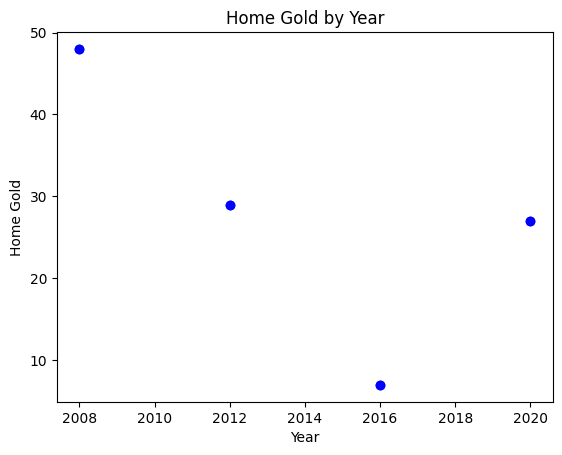

In [ ]:
plt.plot(df.Year.iloc[[0, 1, 4, 5, 8, 9, 12, 13]], df.HomeGold.iloc[[0, 1, 4, 5, 8, 9, 12, 13]], "ob")
plt.xlabel("Year")
plt.ylabel("Home Gold")
plt.title("Home Gold by Year")

Text(0.5, 1.0, 'Away Gold by Year')

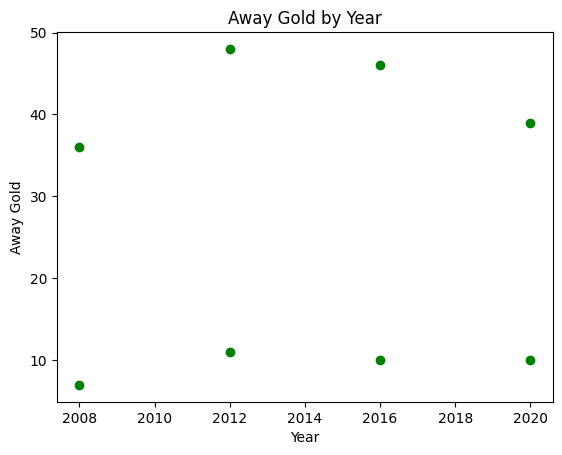

In [ ]:
plt.plot(df.Year.iloc[[0, 1, 4, 5, 8, 9, 12, 13]], df.AwayGold.iloc[[0, 1, 4, 5, 8, 9, 12, 13]], "og")
plt.xlabel("Year")
plt.ylabel("Away Gold")
plt.title("Away Gold by Year")

Text(0.5, 1.0, 'Home Gold by Year')

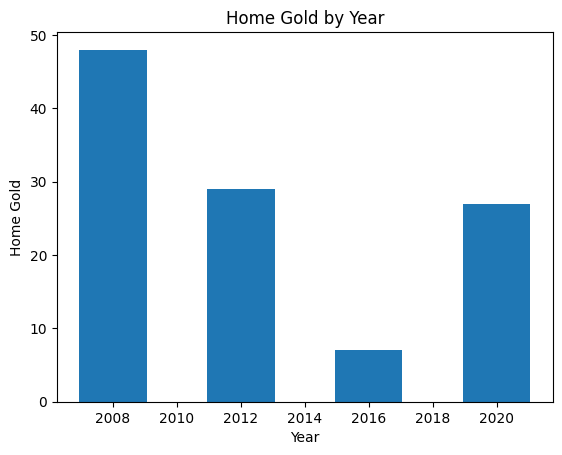

In [ ]:
plt.bar(df.Year.iloc[[0, 1, 4, 5, 8, 9, 12, 13]], df.HomeGold.iloc[[0, 1, 4, 5, 8, 9, 12, 13]], 2.1)
plt.xlabel("Year")
plt.ylabel("Home Gold")
plt.title("Home Gold by Year")

Text(0.5, 1.0, 'Away Gold by Year')

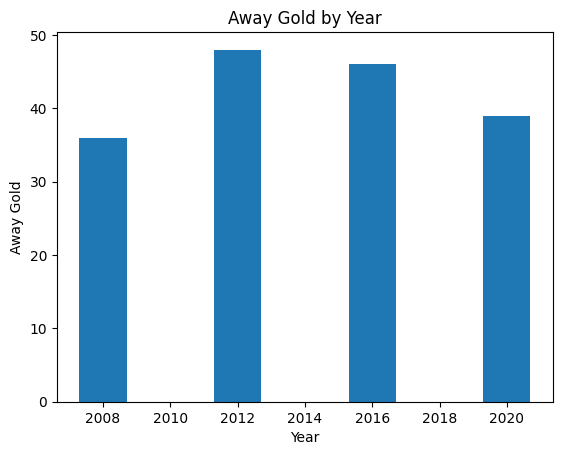

In [ ]:
plt.bar(df.Year.iloc[[0, 1, 4, 5, 8, 9, 12, 13]], df.AwayGold.iloc[[0, 1, 4, 5, 8, 9, 12, 13]], 1.4)
plt.xlabel("Year")
plt.ylabel("Away Gold")
plt.title("Away Gold by Year")